In [2]:
import neuralnetwork as nn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow import math
from tqdm import tqdm_notebook as tqdm

In [2]:
test_df = pd.read_csv('data/mnist_test.csv')
train_df = pd.read_csv('data/mnist_train.csv')

train_values = train_df.values
test_values = test_df.values

In [15]:
# set parameters
input_nodes = 784
hidden_nodes = 500
output_nodes = 10
learning_rate = 0.1
epochs = 5

In [16]:
# initialize the neural network
neural_net = nn.NeuralNetwork(input_nodes, hidden_nodes, output_nodes, learning_rate)

In [17]:
# train the neural network
for epoch in range(epochs):
    for record in tqdm(train_values):

        # rescale pixel values so they are in the range 0.01-1 instead of 0-255 to work with activation function
        scaled_inputs = (np.asfarray(record[1:]) / 255.0 * 0.99) + 0.01

        # define target output values given the network's activation function's range
        targets = np.zeros(output_nodes) + 0.01
        targets[int(record[0])] = 0.99

        neural_net.train(scaled_inputs, targets)

In [18]:
# test the neural network
score = []
predictions = []
labels = []

for record in tqdm(test_values):
    
    # rescale pixel values so they are in the range 0.01-1 instead of 0-255 to work with activation function
    scaled_inputs = (np.asfarray(record[1:]) / 255.0 * 0.99) + 0.01
    
    # define target output values given the network's activation function's range
    targets = np.zeros(output_nodes) + 0.01
    label = int(record[0])
    targets[label] = 0.99
    
    # obtain the neural net's prediction
    output = neural_net.query(scaled_inputs)
    prediction = np.argmax(output)
    
    if prediction == label:
        score.append(1)
    else:
        score.append(0)
    
    predictions.append(prediction)
    labels.append(label)

score_array = np.asarray(score)
predictions_array = np.asarray(predictions)
labels_array = np.asarray(labels)

# compute the performance
accuracy = score_array.sum() / score_array.size

print("Accuracy: ", accuracy)


Accuracy:  0.9758


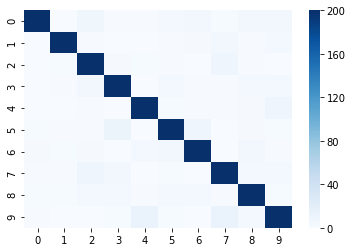

In [13]:
# plot the confusion matrix
confusion_matrix = math.confusion_matrix(predictions_array, labels_array)
sns.heatmap(confusion_matrix, vmax=200, cmap='Blues')
plt.show();

In [14]:
output.astype(float)

array([[0.01264667],
       [0.01134177],
       [0.00396119],
       [0.00992686],
       [0.01203458],
       [0.00829792],
       [0.99233521],
       [0.00103951],
       [0.00202333],
       [0.00295703]])